In [8]:
pip install os-sys

  Using cached os_sys-2.1.4-py3-none-any.whl (15.6 MB)
  Using cached PyYAML-5.1.2-cp37-cp37m-win_amd64.whl (215 kB)
Processing c:\users\lenovo\appdata\local\pip\cache\wheels\45\6c\46\a1865e7ba706b3817f5d1b2ff7ce8996aabdd0d03d47ba0266\nltk-3.5-py3-none-any.whl
  Using cached SQLAlchemy-1.3.18-cp37-cp37m-win_amd64.whl (1.2 MB)
  Using cached spacy-2.2.0-cp37-cp37m-win_amd64.whl (9.3 MB)
  Using cached os_sys_php-2019.10.13-py3-none-any.whl (38.6 MB)
Processing c:\users\lenovo\appdata\local\pip\cache\wheels\62\be\3a\abe5eea7cf118ab19214229d2ae5a8bb2b85202016bc3ee1f3\wifi-0.3.8-py3-none-any.whl
  Using cached mathparse-0.1.2-py3-none-any.whl (7.2 kB)
  Using cached netifaces-0.10.9-cp37-cp37m-win_amd64.whl (16 kB)
  Using cached regex-2020.7.14-cp37-cp37m-win_amd64.whl (268 kB)
  Using cached thinc-7.1.1-cp37-cp37m-win_amd64.whl (1.9 MB)
Processing c:\users\lenovo\appdata\local\pip\cache\wheels\dc\5e\d4\727b6213e9ebec502ff1bf5998f4a83fef87c3aace8a492243\wasabi-0.7.1-py3-none-any.whl
  Usi

ERROR: Cannot uninstall 'PyYAML'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.



  Using cached plac-0.9.6-py2.py3-none-any.whl (20 kB)
  Using cached preshed-3.0.2-cp37-cp37m-win_amd64.whl (105 kB)
  Using cached blis-0.4.1-cp37-cp37m-win_amd64.whl (5.0 MB)
  Using cached murmurhash-1.0.2-cp37-cp37m-win_amd64.whl (20 kB)
Processing c:\users\lenovo\appdata\local\pip\cache\wheels\49\16\ea\daca297d70ee0782ac6e16e83b2c55b2ca42a2113750bc0489\pbkdf2-1.3-py3-none-any.whl
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 5.3.1


In [9]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [10]:
import os
import cv2
import numpy as np
import pandas as pd 

In [11]:
data_path='C:\\Users\\lenovo\\Dropbox\\My PC (LAPTOP-AH9L381P)\\Desktop\\resume\\imagedata'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) 

print(label_dict)
print(categories)
print(labels)

{'with mask': 0, 'without mask': 1}
['with mask', 'without mask']
[0, 1]


In [12]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            resized=cv2.resize(gray,(img_size,img_size))
            data.append(resized)
            target.append(label_dict[category])
    

        except Exception as e:
            print('Exception:',e)
            

In [13]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

Using TensorFlow backend.


In [14]:
np.save('data',data)
np.save('target',new_target)

In [15]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [16]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
pip install scikit-learn

In [18]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [19]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 990 samples, validate on 248 samples
Epoch 1/20
990/990 [==============================] - 37s 37ms/step - loss: 0.6982 - accuracy: 0.5646 - val_loss: 0.5743 - val_accuracy: 0.6774
Epoch 2/20
990/990 [==============================] - 37s 37ms/step - loss: 0.5190 - accuracy: 0.7535 - val_loss: 0.4768 - val_accuracy: 0.7702
Epoch 3/20
990/990 [==============================] - 37s 38ms/step - loss: 0.3142 - accuracy: 0.8798 - val_loss: 0.2856 - val_accuracy: 0.8790
Epoch 4/20
990/990 [==============================] - 38s 38ms/step - loss: 0.2264 - accuracy: 0.9162 - val_loss: 0.3294 - val_accuracy: 0.8347
Epoch 5/20
990/990 [==============================] - 37s 38ms/step - loss: 0.1808 - accuracy: 0.9323 - val_loss: 0.2249 - val_accuracy: 0.9113
Epoch 6/20
990/990 [==============================] - 38s 39ms/step - loss: 0.1557 - accuracy: 0.9424 - val_loss: 0.1843 - val_accuracy: 0.9355
Epoch 7/20
990/990 [==============================] - 45s 45ms/step - loss: 0.1172 - accur

In [20]:
pip install matplotlib

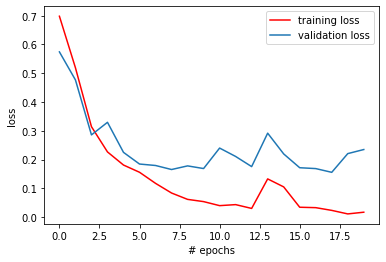

In [21]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

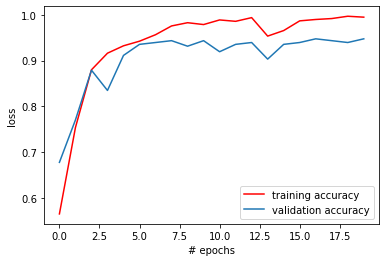

In [22]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [23]:
print(model.evaluate(test_data,test_target))

138/138 [==============================] - 2s 12ms/step
[0.27499886335968715, 0.9202898740768433]


In [24]:
from keras.models import load_model

In [25]:
model = load_model('C:\\Users\\lenovo\\Dropbox\\My PC (LAPTOP-AH9L381P)\\Desktop\\resume\\model-017.model')

face_clsfr=cv2.CascadeClassifier('C:\\Users\\lenovo\\Dropbox\\My PC (LAPTOP-AH9L381P)\\Desktop\\resume\\haarcascade_frontalface_default.xml')

source=cv2.VideoCapture(2)

labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}

In [ ]:
while(True):
    cap = cv2.VideoCapture(0)
    ret,img=cap.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for (x,y,w,h) in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
.release()
